### (1) Install Python Packages (Run Once)

Run the section below to install needed Python packages

In [ ]:
import sys
!{sys.executable} -m pip install -r requirements.txt

### (2) Edit Tool Configuration and Execute

#### (2.1) Generating or loading a video sequence

You can choose to load pre-existing pattern by setting `generate_pattern = False` and providing the video sequence name.
Or you can generate a new video sequence by specifiying the patterns following the hierarchical structure:

- `ProjectionSequence()`
    - `Frames()`
        - `Subframes()`
            - `Patterns()`

Each level has its own parameters and contains a list of the lower-level strucutre. Please, do not forget to provide a video sequence name even if you generate a new one. 

<span style="color:red">Please only edit the cell between the lines `### DO NOT MOVE OR REMOVE THIS COMMENT x ###`</span>. These comments lines are essential for correctly storing the configuration. Please do not edit, move or remove them.

In [1]:
import os
from utilities.common_utilities import save_cell

### PLASE EDIT BELOW - DO NOT MODIFY THIS COMMENT ###
from run_stages.pattern_generation_stage import Text, Grating, Rectangle, Circle, FullField, Subframe, Frame, ProjectionSequence

generate_pattern = False
video_sequence_name = ["input_sample_1"]

text_shapes_subframes = [
    Subframe(duration_ms=15, patterns=[Text(user_position=(0, 0), rotation=0, unit="pixel", text="C", gap_size = 1.5)]),
    Subframe(duration_ms=15, patterns=[Rectangle(user_position=(2, 5), rotation=45, unit="um", width=75, height=75),
                                    Rectangle(user_position=(-2, 5), rotation=45, unit="pixel", width=0.75, height=0.75)]),
    Subframe(duration_ms=15, patterns=[Circle(user_position=(2, -5.5), unit="um", diameter=150),
                                    Circle(user_position=(-2, -5.5), unit="pixel", diameter=1.5)]),
    Subframe(duration_ms=30, patterns=[Text((-5, 0), 90, "THIS IS \n\nA SIMPLE TEST.", unit="um", letter_size=100),
                                    Text((5.5, 0), -90, "THIS IS \nA SIMPLE TEST.", unit="pixel", letter_size=1), 
                                    ]),
    Subframe(duration_ms=10, patterns=[FullField("white")]),
    Subframe(duration_ms=15, patterns=[FullField("black")])

]
grating_subframes = [
    Subframe(duration_ms=35, patterns=[Grating(user_position=(1.5, 0), rotation=45, unit="um", width_grating=75, pitch_grating=75)]),
    Subframe(duration_ms=40, patterns=[Grating(user_position=(0,0), rotation= -60, unit="pixel", width_grating=1, pitch_grating=1)]),
    Subframe(duration_ms=25, patterns=[FullField("black")])
]
list_of_frames = [
    Frame(name="00_Text_shapes", repetitions=1, subframes=text_shapes_subframes),
    Frame(name="01_Grating", repetitions=2, subframes=grating_subframes)
]

#list_projections =  [ProjectionSequence(intensity=1.0, frequency=10, frames=list_of_frames), ProjectionSequence(intensity=3.0, frequency=10, frames=list_of_frames)]
list_projections =  [ProjectionSequence(intensity=1.0, frequency=10, frames=list_of_frames)] 

### PLEASE EDIT ABOVE - DO NOT MODIFY THIS COMMENT ###

# Related to saving this cell
path_projection_sequence_script = os.path.join(os.getcwd(), "proj_seq_script.py")
# If the file already exists, it is previous configuration which should have been deleted
os.remove(path_projection_sequence_script)  if os.path.exists(path_projection_sequence_script) else None
%history -n -f proj_seq_script.py
save_cell(path_projection_sequence_script, generate_pattern)

#### (2.2) Other configuration settings

[2023-11-15 10:38:02] INFO       run_rpsim        Staring a new run
[2023-11-15 10:38:02] INFO       run_rpsim        Output directory: c:\Users\PalankerLab_Goose\Documents\Quentin\RPSim\user_files\user_output\10_38_02-2023_11_15
[2023-11-15 10:38:02] INFO       run_rpsim        Requested run stages: ['pattern_generation', 'resistive_mesh', 'current_sequence', 'circuit', 'simulation', 'post_process', 'plot_results']
[2023-11-15 10:38:02] INFO       run_rpsim        Running the following configuration
+-----------------------------------+-----------------------------------------------------------------------------------------------------------------------------------+
| model                             | bipolar                                                                                                                           |
| pixel_size                        | 100                                                                                                                 

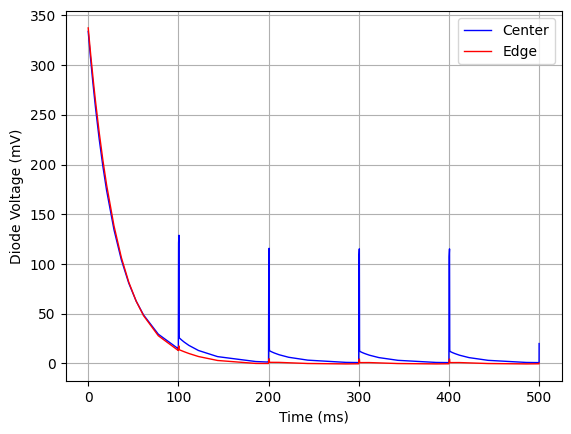

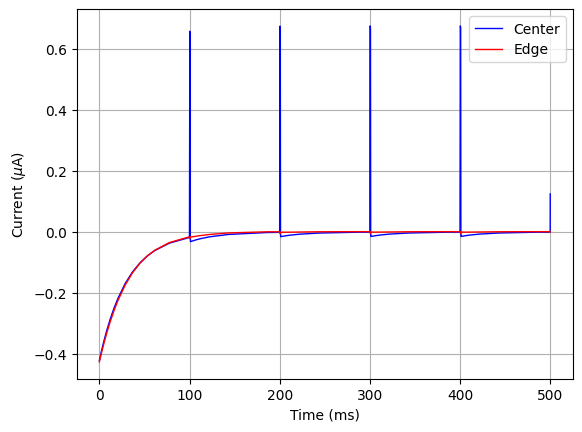

In [2]:
%run proj_seq_script.py 
os.remove(path_projection_sequence_script) if generate_pattern else None

### CONFIGURATION
configuration = {}

# geometry-defined configuration
configuration["model"]                            = "bipolar"     # model geometry: monopolar or bipolar
configuration["pixel_size"]                       = 100           # pixel size
configuration["pixel_size_suffix"]                = ""         # If large format is required, use "-lg", else use "" 
configuration["frame_width"]                      = 1000          # implant radius in mm
configuration["geometry"]                         = "Flat_human"  # geometry settings: HC/Pillar/Flat devices in pdish/rat/human
configuration["number_of_diodes"]                 = 2             # number of photo diodes per pixel
configuration["sirof_capacitance"]                = 6             # SIROF capacitance in mF/cm^2
configuration["photosensitive_area_edge_to_edge"] = 92            # edge-to-edge size of the photosensitive area
configuration["active_electrode_radius"]          = 17            # radius of the active electrode in um
configuration["light_to_current_conversion_rate"] = 0.4           # light to current conversion rate in A/W
configuration["photosensitive_area"]              = 4075.72       # total photosensitive area in um^2. Assign "None" for auto calculation

# R matrix parameters
configuration["r_matrix_output_file"]             = f'R_{configuration["geometry"]}_PS{configuration["pixel_size"]}{configuration["pixel_size_suffix"]}.pkl' 
configuration["r_matrix_conductivity"]            = 1             # conductivity scaling factor of the electrolyte

# dynamic simulation configuration
configuration["Ipho_scaling"]                     = 1             # artificial scaling of photo current, useful for parametric sweep (e.g. S-D curve)
configuration["Isat"]                             = 0.02          # diode saturation current in pA
configuration["ideality_factor"]                  = 1.14          # ideality factor n of the diode
configuration["shunt_resistance"]                 = 790.15E3      # shunt resistance in Ohm. Assign "None" if no shunt
configuration["initial_Vactive"]                  = .4            # Initial bias of the active electrode in V
configuration["temperature"]                      = 37
configuration["nominal_temperature"]              = 25
configuration["simulation_duration_sec"]          = 0.5           # simulation duration in seconds
configuration["simulation_resolution_ms"]         = None          # None defaults to Xyce inner value

# input paths
configuration["user_files_path"]                  = None          # If set to None, defaults to inner user_files directory

#### Projection sequences related ####

configuration["video_sequence_name"]              = video_sequence_name
configuration["generate_pattern"]                 = generate_pattern
configuration["projection_sequences"]             = list_projections
configuration["path_projection_sequence_script"]  = path_projection_sequence_script
configuration["font_path"]                        = os.path.abspath("utilities/Sloan.otf")

configuration["pixel_label_input_file"]           = f'image_sequence/pixel_label_PS{configuration["pixel_size"]}{configuration["pixel_size_suffix"]}.pkl'

# define input files for monopolar arrays
configuration["monopolar"] = \
    {
    "return_to_active_area_ratio": 1.465123,                      # ratio between return area and total active
        # area
    "r_matrix_input_file_diagonal": f'r_matrix/COMSOL_results/{configuration["geometry"]}_PS{configuration["pixel_size"]}_EP_self.csv',
    "r_matrix_input_file_non_diagonal": f'r_matrix/COMSOL_results/{configuration["geometry"]}_PS{configuration["pixel_size"]}_EP_Rmat.csv',
    "r_matrix_simp_ratio": 0.1
    }

# define input files for bipolar arrays
configuration["bipolar"] = \
    {
    "additional_edges": 142,                                     # bipolar only: edge segments of the return
    "r_matrix_input_file_active": f'r_matrix/COMSOL_results/{configuration["geometry"]}_PS{configuration["pixel_size"]}_UCD_active.csv', #
    "r_matrix_input_file_return": f'r_matrix/COMSOL_results/{configuration["geometry"]}_PS{configuration["pixel_size"]}_UCD_return.csv', #
    "r_matrix_input_file_return_neighbor": f'r_matrix/COMSOL_results/{configuration["geometry"]}_PS{configuration["pixel_size"]}_UCD_return_neighbor.csv', #
    "r_matrix_input_file_return_near": f'r_matrix/COMSOL_results/{configuration["geometry"]}_PS{configuration["pixel_size"]}_UCD_return_near.csv', #
    "r_matrix_input_file_px_pos": f'r_matrix/COMSOL_results/PS{configuration["pixel_size"]}{configuration["pixel_size_suffix"]}_pos.csv' # 
    }

# post-process parameters
configuration["post_process"] = \
    {
    "stimulation_duration_in_ms": 9.8,
    "analyze_time_dynamics": False,
    "pulse_start_time_in_ms": 200,
    "depth_values_in_um": None                                      # if None, defaults to all available in model
    }


### EXECUTION
from RPSim import run_rpsim
run_stages = None
run_rpsim(configuration=configuration, run_stages=run_stages)